In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from time import time
import datetime
from sklearn.decomposition import PCA

In [2]:
breast_cancer=load_breast_cancer()

In [3]:
X=breast_cancer.data
Y=breast_cancer.target

In [4]:
X.shape

(569, 30)

In [5]:
Y.shape

(569,)

In [6]:
#复习一下之前的PCA降维算法
pca=PCA()
pca=pca.fit(X,Y)
pca.explained_variance_ratio_.shape

(30,)

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

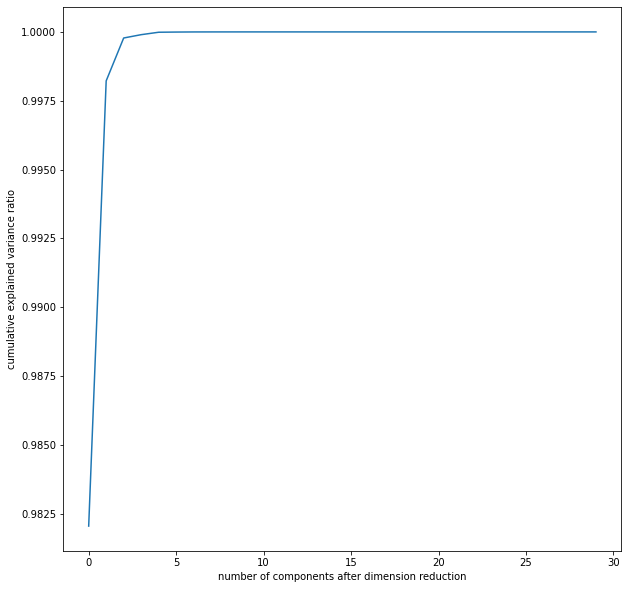

In [8]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [9]:
pca=PCA(n_components=0.98,svd_solver="full")
pca=pca.fit(X,Y)

In [10]:
pca.explained_variance_

array([443782.6051466])

In [11]:
pca.n_components_

1

In [12]:
pca=PCA(n_components="mle").fit(X,Y)

In [13]:
pca.n_components_

29

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [15]:
#测试集和训练集进行划分
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=420)

In [16]:
#使用time
datetime.datetime.fromtimestamp(time()).strftime("%Y-%m-%d-%H-%M-%S")

'2020-10-15-14-48-46'

In [17]:
#开始探究不同的核函数的优和劣
kernel=["linear","poly","rbf","sigmoid"]
for k in kernel:
    time0=time()
    clf=SVC(kernel=k
            ,gamma="auto"
            ,degree=1
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f"%(k,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:01:322551
The accuracy under kernel poly is 0.923977
00:00:150984
The accuracy under kernel rbf is 0.596491
00:00:072002
The accuracy under kernel sigmoid is 0.596491
00:00:022000


In [20]:
#由于数据存在着不一样的量纲，所以进行无量纲化
import pandas as pd
from  sklearn.preprocessing import StandardScaler
dt=pd.DataFrame(X)
dt.describe([0.1,0.2,0.3,0.4,0.5,.6,.7,.8,.9,.99]).T
# X_dr=StandardScaler().fit_transform(X)
# X_dr

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,10.260000,11.366000,12.012000,12.726000,13.370000,14.058000,15.056000,17.068000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,14.078000,15.656000,16.840000,17.912000,18.840000,19.968000,21.272000,22.440000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,65.830000,73.292000,77.360000,81.938000,86.240000,91.420000,98.200000,111.680000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,321.600000,396.560000,444.060000,496.440000,551.100000,609.740000,700.660000,915.060000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.079654,0.084206,0.087914,0.091828,0.095870,0.099338,0.103260,0.107500,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.049700,0.059638,0.070390,0.079530,0.092630,0.108740,0.122420,0.141900,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.013686,0.024930,0.034400,0.045070,0.061540,0.086212,0.111920,0.149780,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.011158,0.017866,0.022788,0.027982,0.033500,0.048318,0.064496,0.084254,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.149580,0.158760,0.165080,0.172000,0.179200,0.185480,0.192800,0.200540,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.055338,0.056864,0.058840,0.060204,0.061540,0.063148,0.065048,0.067630,0.072266,0.085438,0.09744


In [22]:
type(dt)

pandas.core.frame.DataFrame

In [19]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_dr,Y,test_size=0.3,random_state=420)
for k in kernel:
    time0=time()
    clf=SVC(kernel=k
            ,gamma="auto"
            ,degree=1
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f"%(k,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:013999
The accuracy under kernel poly is 0.964912
00:00:019002
The accuracy under kernel rbf is 0.970760
00:00:033998
The accuracy under kernel sigmoid is 0.953216
00:00:018005


0.9766081871345029 0.012067926406393264


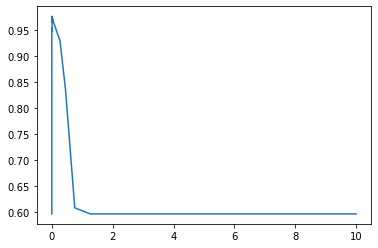

In [20]:
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=200).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

In [23]:
'''
由于多项式核函数来说，
有三个参数共同作用在一个数学公式上影响他的效果，因此，我们往往使用网格搜索来共同调整三个对多项式核函数有影响的参数
'''
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
time0=time()
gamma_range=np.linspace(-10,1,20)
coef0_range=np.linspace(0,5,10)
parameters={"gamma":gamma_range
            ,"coef0":coef0_range}
cv=StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=420)
grid=GridSearchCV(SVC(kernel="poly",degree=1,cache_size=200)
                 ,param_grid=parameters
                 ,cv=cv
                 )
grid.fit(X,Y)
print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, 
grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 276, in _dense_fit
    max_iter=self.max_iter, random_seed=random_seed)
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  FitFailedWarning)
E:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The sco

The best parameters are {'coef0': 2.7777777777777777, 'gamma': 1.0} with a score of 0.95439
03:51:684607


C
浮点数，默认1，必须大于等于0，可不填
松弛系数的惩罚项系数。如果C值设定比较大，那SVC可能会选择边际较小的，能够更好地分类所有训
练点的决策边界，不过模型的训练时间也会更长。如果C的设定值较小，那SVC会尽量最大化边界，决
策功能会更简单，但代价是训练的准确度。换句话说，C在SVM中的影响就像正则化参数对逻辑回归的
影响。
在实际使用中，C和核函数的相关参数（gamma，degree等等）们搭配，往往是SVM调参的重点。与gamma不同，C没有出现在对偶函数中出现，并且明确了调参目标，所以我们可以明确我们究竟是否需要训练集上的高精确度来调整C的方向，默认情况C为1，通常来说这都是一个合理的参数，如果我们的数据很嘈杂，那我们往往减下C，当然我们也可以使用网格搜索或者学习曲线来调整C的值

0.9766081871345029 1.2340816326530613


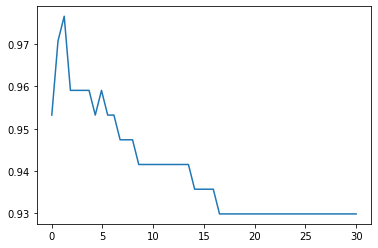

In [21]:
#下面来调整参数C
score=[]
C_range=np.linspace(0.01,30,50)
for i in C_range:
    clf=SVC(kernel="linear",C=i,gamma=0.012742749857031322,cache_size=200).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9590643274853801 5.0


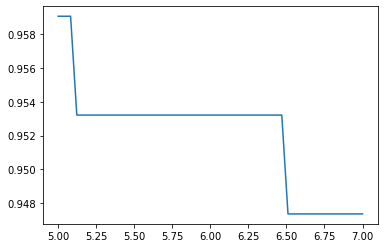

In [22]:
#进一步细化
score=[]
C_range=np.linspace(5,7,50)
for i in C_range:
    clf=SVC(kernel="linear",C=i,gamma=0.012742749857031322,cache_size=200).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()